In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns

In [256]:
TRAIN_PATH='../input/sales_train.csv'
TEST_PATH='../input/test.csv'
SAMPLE_PATH='../input/sample_submission.csv'
ITEM_PATH='../input/items.csv'
ITEM_CATEGORIES_PATH='../input/item_categories.csv'
SHOP_PATH='../input/shops.csv'

In [257]:
train=pd.read_csv(TRAIN_PATH)
test=pd.read_csv(TEST_PATH)
sample=pd.read_csv(SAMPLE_PATH)
item=pd.read_csv(ITEM_PATH)
item_categories=pd.read_csv(ITEM_CATEGORIES_PATH)
shop=pd.read_csv(SHOP_PATH)

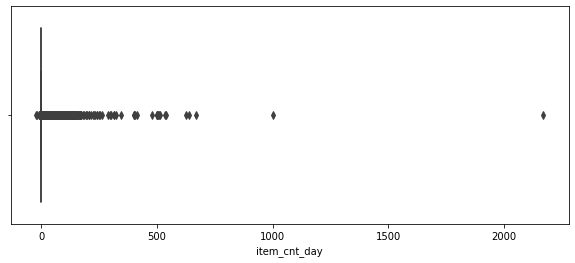

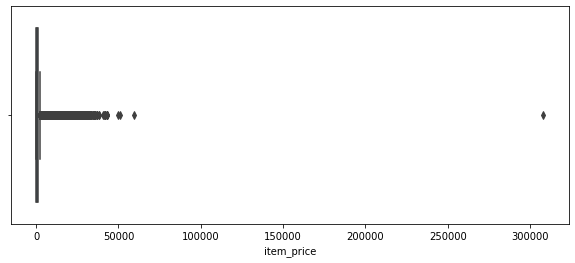

In [258]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_cnt_day)

plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_price)

In [259]:
display(train[train.item_price>100000])
train=train[train.item_price<100000]
display(train[train.item_cnt_day>1001])
train=train[train.item_cnt_day<1001]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,28.10.2015,33,12,11373,0.908714,2169.0


In [260]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [261]:
# item_priceがマイナスなのはおかしい
train[train.item_price<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [262]:
# item_priceがマイナスの要素を、同じ店で同じ商品、同じ時期の価格の中央値を入れる
median=train[(train.shop_id==32)&(train.item_id==2973)&(train.date_block_num==4)&(train.item_price>0)]
display(median)
median=median.item_price.median()
train.loc[train.item_price<0,'item_price']=median

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484682,23.05.2013,4,32,2973,1249.0,1.0
484684,06.05.2013,4,32,2973,2499.0,1.0


In [263]:
print(np.unique(shop.shop_name))

['!Якутск Орджоникидзе, 56 фран' '!Якутск ТЦ "Центральный" фран'
 'Адыгея ТЦ "Мега"' 'Балашиха ТРК "Октябрь-Киномир"'
 'Волжский ТЦ "Волга Молл"' 'Вологда ТРЦ "Мармелад"'
 'Воронеж (Плехановская, 13)' 'Воронеж ТРЦ "Максимир"'
 'Воронеж ТРЦ Сити-Парк "Град"' 'Выездная Торговля'
 'Жуковский ул. Чкалова 39м?' 'Жуковский ул. Чкалова 39м²'
 'Интернет-магазин ЧС' 'Казань ТЦ "Бехетле"' 'Казань ТЦ "ПаркХаус" II'
 'Калуга ТРЦ "XXI век"' 'Коломна ТЦ "Рио"' 'Красноярск ТЦ "Взлетка Плаза"'
 'Красноярск ТЦ "Июнь"' 'Курск ТЦ "Пушкинский"' 'Москва "Распродажа"'
 'Москва МТРЦ "Афи Молл"' 'Москва Магазин С21'
 'Москва ТК "Буденовский" (пав.А2)' 'Москва ТК "Буденовский" (пав.К7)'
 'Москва ТРК "Атриум"' 'Москва ТЦ "Ареал" (Беляево)'
 'Москва ТЦ "МЕГА Белая Дача II"' 'Москва ТЦ "МЕГА Теплый Стан" II'
 'Москва ТЦ "Новый век" (Новокосино)' 'Москва ТЦ "Перловский"'
 'Москва ТЦ "Семеновский"' 'Москва ТЦ "Серебряный Дом"'
 'Мытищи ТРК "XL-3"' 'Н.Новгород ТРЦ "РИО"' 'Н.Новгород ТРЦ "Фантастика"'
 'Новосибирск Т

In [264]:
print(shop.shop_name[11])
print(shop.shop_name[10])
print(shop.shop_name[0])
print(shop.shop_name[57])
print(shop.shop_name[1])
print(shop.shop_name[58])

Жуковский ул. Чкалова 39м²
Жуковский ул. Чкалова 39м?
!Якутск Орджоникидзе, 56 фран
Якутск Орджоникидзе, 56
!Якутск ТЦ "Центральный" фран
Якутск ТЦ "Центральный"


In [265]:
# 店の名前が重複している？ので訂正する
train.loc[train.shop_id==10,'shop_id']=11
train.loc[train.shop_id==0,'shop_id']=57
train.loc[train.shop_id==1,'shop_id']=58

In [266]:
## 店名のはじめが地名でなので、新しい特徴量として使う
# ２文字に分かれている地名はsplitする時に別々になってしまうので、一つに訂正
shop.loc[shop.shop_name=='Сергиев Посад ТЦ "7Я"','shop_name']='СергиевПосад ТЦ "7Я"'
# series型はsplitできないので、一回str型に直す。1文字目に興味があるので、抜き出す
city=shop['shop_name'].str.split(' ').map(lambda x:x[0])
print(city[:5])
shop['city']=city

from sklearn.preprocessing import LabelEncoder
encode_city=LabelEncoder().fit_transform(shop['city'])
print('number of city:',len(np.unique(city)))
print(encode_city)
shop['city_code']=encode_city

0     !Якутск
1     !Якутск
2      Адыгея
3    Балашиха
4    Волжский
Name: shop_name, dtype: object
number of city: 32
[ 0  0  1  2  3  4  5  5  5  6  7  7  8  9  9 10 11 12 12 13 14 14 14 14
 14 14 14 14 14 14 14 14 14 15 16 16 17 17 18 19 19 19 20 20 21 21 22 23
 24 25 25 25 26 26 27 28 29 30 30 31]


In [267]:
item_categoriies.head()

,item_category_name,item_category_id,split,type_code
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]",0
1,Аксессуары - PS2,1,"[Аксессуары , PS2]",1
2,Аксессуары - PS3,2,"[Аксессуары , PS3]",1
3,Аксессуары - PS4,3,"[Аксессуары , PS4]",1
4,Аксессуары - PSP,4,"[Аксессуары , PSP]",1


In [268]:
# 商品名のはじめがカテゴリーで、２つ目以降がサブカテゴリーなので、分けてみる
item_categories['split']=item_categories['item_category_name'].str.split('-')
item_categories['type']=item_categories['split'].map(lambda x:x[0].strip())
type_code=LabelEncoder().fit_transform(item_categories['type'])
print('number of item type:',len(np.unique(item_categories['type'])))
print(type_code)
item_categories['type_code']=type_code

item_categories['subtype']=item_categories['split'].map(lambda x:x[1].strip() if len(x)>1 else x[0].strip())
subtype_code=LabelEncoder().fit_transform(item_categories['subtype'])
print('number of item subtype:',len(np.unique(item_categories['subtype'])))
print(subtype_code)
item_categories['subtype_code']=subtype_code
item_categories = item_categories[['item_category_id','type_code', 'subtype_code']]

number of item type: 20
[ 0  1  1  1  1  1  1  1  2  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  6  7  8  8  8  8 10  9  9  9  9 11 11 11 11 11 12 12 12 12 12 12
 12 12 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14
 14 15 15 15 15 15 15 16 16 17 18 19]
number of item subtype: 65
[29  9 10 11 13 14 16 17 26 33  9 10 11 13 14 16 17 50  9 10 11 13 14 16
 17 18 61 61 32 36 55 61 34  5  6 12 15  1  1  1  4 35 19 21 22 23 24 37
 38 39 46 49 51 60 61  2  3  8 27 40 48 20 28 41 42 43 47 52 53 56 57 58
 59  0  7 30 31 44 45 54 25 62 63 64]


In [269]:
item_categories.head()

,item_category_id,type_code,subtype_code
0,0,0,29
1,1,1,9
2,2,1,10
3,3,1,11
4,4,1,13


In [270]:
item.drop(['item_name'],inplace=True,axis=1)

In [271]:
len(set(train.item_id))

21806

In [272]:
len(set(test.item_id))

5100

In [273]:
# trainにはないtestデータ中のitem_idの数をカウント
print(len(list(set(test.item_id)-set(test.item_id).intersection(set(train.item_id)))))
print(len(set(test.item_id)))
print(len(test))

363
5100
214200


In [274]:
from itertools import product
matrix=[]
cols = ['date_block_num','shop_id','item_id']
for i in set(train['date_block_num']):
    sales=train[train.date_block_num==i]
    matrix.append(np.array(list(product([i],sales.shop_id.unique(),sales.item_id.unique())),dtype='int16'))

In [275]:
matrix=pd.DataFrame(np.vstack(matrix),columns=cols)
matrix['date_block_num']=matrix['date_block_num'].astype(np.int8)
matrix['shop_id']=matrix['shop_id'].astype(np.int8)
matrix['item_id']=matrix['item_id'].astype(np.int16)
matrix.sort_values(cols,inplace=True)

In [276]:
train['revenue']=train['item_price']*train['item_cnt_day']

In [277]:
group=train.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day':['sum']})
display(group.head())
group.columns=['item_cnt_month']
group.reset_index(inplace=True)
display(group.head())

item_cnt_day
                                        sum
date_block_num shop_id item_id             
0              2       27               1.0
                       33               1.0
                       317              1.0
                       438              1.0
                       471              2.0

,date_block_num,shop_id,item_id,item_cnt_month
0,0,2,27,1.0
1,0,2,33,1.0
2,0,2,317,1.0
3,0,2,438,1.0
4,0,2,471,2.0


In [278]:
matrix=pd.merge(matrix,group,on=cols,how='left')
display(matrix.head())
matrix['item_cnt_month']=matrix['item_cnt_month'].fillna(0).clip(0.2).astype(np.float16)
display(matrix)

,date_block_num,shop_id,item_id,item_cnt_month
0,0,2,19,NaN
1,0,2,27,1.0
2,0,2,28,NaN
3,0,2,29,NaN
4,0,2,32,NaN


,date_block_num,shop_id,item_id,item_cnt_month
0,0,2,19,0.199951
1,0,2,27,1.000000
2,0,2,28,0.199951
3,0,2,29,0.199951
4,0,2,32,0.199951
5,0,2,33,1.000000
6,0,2,34,0.199951
7,0,2,35,0.199951
8,0,2,40,0.199951
9,0,2,41,0.199951


In [279]:
test['date_block_num'] = 34
test['date_block_num'] = test['date_block_num'].astype(np.int8)
test['shop_id'] = test['shop_id'].astype(np.int8)
test['item_id'] = test['item_id'].astype(np.int16)

In [280]:
matrix = pd.concat([matrix, test], ignore_index=True, sort=False, keys=cols)
matrix.fillna(0, inplace=True) # 34 month

In [281]:
matrix = pd.merge(matrix, shop, on=['shop_id'], how='left')
matrix = pd.merge(matrix, item, on=['item_id'], how='left')
matrix = pd.merge(matrix, item_categories, on=['item_category_id'], how='left')
matrix['city_code'] = matrix['city_code'].astype(np.int8)
matrix['item_category_id'] = matrix['item_category_id'].astype(np.int8)
matrix['type_code'] = matrix['type_code'].astype(np.int8)
matrix['subtype_code'] = matrix['subtype_code'].astype(np.int8)

In [282]:
def lag_feature(df, lags, col):
    tmp = df[['date_block_num','shop_id','item_id',col]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['date_block_num','shop_id','item_id', col+'_lag_'+str(i)]
        shifted['date_block_num'] += i
        df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df

In [283]:
matrix = lag_feature(matrix, [1,2,3,6,12], 'item_cnt_month')

In [284]:
group = matrix.groupby(['date_block_num']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num'], how='left')
matrix['date_avg_item_cnt'] = matrix['date_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_avg_item_cnt')
matrix.drop(['date_avg_item_cnt'], axis=1, inplace=True)

In [286]:
group = matrix.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','item_id'], how='left')
matrix['date_item_avg_item_cnt'] = matrix['date_item_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3,6,12], 'date_item_avg_item_cnt')
matrix.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)

In [287]:
group = matrix.groupby(['date_block_num', 'shop_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_shop_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','shop_id'], how='left')
matrix['date_shop_avg_item_cnt'] = matrix['date_shop_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3,6,12], 'date_shop_avg_item_cnt')
matrix.drop(['date_shop_avg_item_cnt'], axis=1, inplace=True)

In [288]:
group = matrix.groupby(['date_block_num', 'item_category_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_cat_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','item_category_id'], how='left')
matrix['date_cat_avg_item_cnt'] = matrix['date_cat_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_cat_avg_item_cnt')
matrix.drop(['date_cat_avg_item_cnt'], axis=1, inplace=True)

In [289]:
group = matrix.groupby(['date_block_num', 'shop_id', 'item_category_id']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_cat_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'item_category_id'], how='left')
matrix['date_shop_cat_avg_item_cnt'] = matrix['date_shop_cat_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_shop_cat_avg_item_cnt')
matrix.drop(['date_shop_cat_avg_item_cnt'], axis=1, inplace=True)

In [290]:
group = matrix.groupby(['date_block_num', 'shop_id', 'type_code']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_type_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'type_code'], how='left')
matrix['date_shop_type_avg_item_cnt'] = matrix['date_shop_type_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_shop_type_avg_item_cnt')
matrix.drop(['date_shop_type_avg_item_cnt'], axis=1, inplace=True)

In [291]:
group = matrix.groupby(['date_block_num', 'shop_id', 'subtype_code']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_subtype_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'subtype_code'], how='left')
matrix['date_shop_subtype_avg_item_cnt'] = matrix['date_shop_subtype_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_shop_subtype_avg_item_cnt')
matrix.drop(['date_shop_subtype_avg_item_cnt'], axis=1, inplace=True)

In [292]:
group = matrix.groupby(['date_block_num', 'city_code']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_city_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'city_code'], how='left')
matrix['date_city_avg_item_cnt'] = matrix['date_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_city_avg_item_cnt')
matrix.drop(['date_city_avg_item_cnt'], axis=1, inplace=True)

In [293]:
group = matrix.groupby(['date_block_num', 'item_id', 'city_code']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_city_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'item_id', 'city_code'], how='left')
matrix['date_item_city_avg_item_cnt'] = matrix['date_item_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_item_city_avg_item_cnt')
matrix.drop(['date_item_city_avg_item_cnt'], axis=1, inplace=True)

In [294]:
group = matrix.groupby(['date_block_num', 'type_code']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_type_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'type_code'], how='left')
matrix['date_type_avg_item_cnt'] = matrix['date_type_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_type_avg_item_cnt')
matrix.drop(['date_type_avg_item_cnt'], axis=1, inplace=True)

In [295]:
group = matrix.groupby(['date_block_num', 'subtype_code']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_subtype_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'subtype_code'], how='left')
matrix['date_subtype_avg_item_cnt'] = matrix['date_subtype_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_subtype_avg_item_cnt')
matrix.drop(['date_subtype_avg_item_cnt'], axis=1, inplace=True)

In [296]:
group = train.groupby(['item_id']).agg({'item_price': ['mean']})
group.columns = ['item_avg_item_price']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['item_id'], how='left')
matrix['item_avg_item_price'] = matrix['item_avg_item_price'].astype(np.float16)

group = train.groupby(['date_block_num','item_id']).agg({'item_price': ['mean']})
group.columns = ['date_item_avg_item_price']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','item_id'], how='left')
matrix['date_item_avg_item_price'] = matrix['date_item_avg_item_price'].astype(np.float16)

lags = [1,2,3,4,5,6]
matrix = lag_feature(matrix, lags, 'date_item_avg_item_price')

for i in lags:
    matrix['delta_price_lag_'+str(i)] = \
        (matrix['date_item_avg_item_price_lag_'+str(i)] - matrix['item_avg_item_price']) / matrix['item_avg_item_price']

def select_trend(row):
    for i in lags:
        if row['delta_price_lag_'+str(i)]:
            return row['delta_price_lag_'+str(i)]
    return 0
    
matrix['delta_price_lag'] = matrix.apply(select_trend, axis=1)
matrix['delta_price_lag'] = matrix['delta_price_lag'].astype(np.float16)
matrix['delta_price_lag'].fillna(0, inplace=True)

# https://stackoverflow.com/questions/31828240/first-non-null-value-per-row-from-a-list-of-pandas-columns/31828559
# matrix['price_trend'] = matrix[['delta_price_lag_1','delta_price_lag_2','delta_price_lag_3']].bfill(axis=1).iloc[:, 0]
# Invalid dtype for backfill_2d [float16]

fetures_to_drop = ['item_avg_item_price', 'date_item_avg_item_price']
for i in lags:
    fetures_to_drop += ['date_item_avg_item_price_lag_'+str(i)]
    fetures_to_drop += ['delta_price_lag_'+str(i)]

matrix.drop(fetures_to_drop, axis=1, inplace=True)

In [297]:
group = train.groupby(['date_block_num','shop_id']).agg({'revenue': ['sum']})
group.columns = ['date_shop_revenue']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','shop_id'], how='left')
matrix['date_shop_revenue'] = matrix['date_shop_revenue'].astype(np.float32)

group = group.groupby(['shop_id']).agg({'date_shop_revenue': ['mean']})
group.columns = ['shop_avg_revenue']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['shop_id'], how='left')
matrix['shop_avg_revenue'] = matrix['shop_avg_revenue'].astype(np.float32)

matrix['delta_revenue'] = (matrix['date_shop_revenue'] - matrix['shop_avg_revenue']) / matrix['shop_avg_revenue']
matrix['delta_revenue'] = matrix['delta_revenue'].astype(np.float16)

matrix = lag_feature(matrix, [1], 'delta_revenue')

matrix.drop(['date_shop_revenue','shop_avg_revenue','delta_revenue'], axis=1, inplace=True)

In [299]:
matrix['month'] = matrix['date_block_num'] % 12

In [300]:
days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
matrix['days'] = matrix['month'].map(days).astype(np.int8)

In [ ]:
cache = {}
matrix['item_shop_last_sale'] = -1
matrix['item_shop_last_sale'] = matrix['item_shop_last_sale'].astype(np.int8)
for idx, row in matrix.iterrows():    
    key = str(row.item_id)+' '+str(row.shop_id)
    if key not in cache:
        if row.item_cnt_month!=0:
            cache[key] = row.date_block_num
    else:
        last_date_block_num = cache[key]
        matrix.at[idx, 'item_shop_last_sale'] = row.date_block_num - last_date_block_num
        cache[key] = row.date_block_num 